In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 500)

In [2]:
bikes = pd.read_csv('Locations_of_Docked_Bikeshare_Stations_by_System_and_Year.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Locations_of_Docked_Bikeshare_Stations_by_System_and_Year.csv'

In [3]:
bikes.columns = ['the_geom', 'id', 'fac_id', 'bike_id', 'system_id', 'system_name',
       'year', 'asofdate', 'fac_name', 'address', 'city', 'state', 'zipcode',
       'cbsa_code', 'longitude', 'latitude']

In [4]:
bikes['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2021, 2020])

In [5]:
bikes = bikes[bikes['year']<2020]

In [6]:
bikes['state'].unique()

array(['NY', 'MN', 'AZ', 'DC', 'IL', 'NJ', 'KS', 'OK', 'WI', 'MD', 'OH',
       'FL', 'NE', 'CA', 'OR', 'IN', 'CO', 'TN', 'VA', 'LA', 'GA', 'HI',
       'MI', 'TX', 'MA', 'ID', 'NC', 'MO', 'PA', 'IA', 'CT', 'WA', 'VT',
       '55411', 'AL', 'SC', 'ND', 'KY', 'NV', 'NM', 'NH', 'UT', 'SD',
       '55407', '55416', '55401', 'WY', '55413', '55405', 'AR', '55404',
       '55402', '60622', '60201', '60611', '60614', '60612', '60626',
       '60621', '60654', '60644', '60637', '60630', '60636', '60609',
       '60618', '60647', '60649', '60202', '60617', '60606', '60661',
       '60625', '60657'], dtype=object)

In [7]:
bikes[bikes['year']<2019]['state'].unique()

array(['NY', 'MN', 'AZ', 'DC', 'IL', 'NJ', 'KS', 'OK', 'WI', 'MD', 'OH',
       'FL', 'NE', 'CA', 'OR', 'IN', 'CO', 'TN', 'VA', 'LA', 'HI', 'MI',
       'MA', 'ID', 'NC', 'MO', 'PA', 'GA', 'TX', 'IA', 'CT', 'WA', 'VT',
       'AL', 'SC', 'ND', 'KY', 'NV', 'NM', 'NH', 'UT', 'SD', 'WY', 'AR'],
      dtype=object)

In [8]:
bikes[bikes['year']==2019]['state'].unique()

array(['NJ', 'NY', 'FL', 'KS', 'AZ', 'CA', 'GA', 'TN', 'VA', 'DC', 'IL',
       'LA', 'TX', 'MN', 'OH', 'MA', 'PA', 'ID', 'MO', 'IN', 'CO', 'WI',
       '55411', 'NE', 'NC', 'UT', 'OK', 'MI', 'IA', '55407', 'ND', 'SC',
       '55416', '55401', 'MD', '55413', '55405', '55404', '55402', 'HI',
       'OR', 'NH', 'KY', 'WY', 'CT', 'NV', '60622', 'AL', 'VT', '60201',
       '60611', '60614', '60612', '60626', '60621', 'AR', '60654',
       '60644', '60637', '60630', '60636', '60609', '60618', '60647',
       '60649', '60202', '60617', '60606', '60661', '60625', '60657'],
      dtype=object)

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28173 entries, 0 to 41861
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   the_geom     28173 non-null  object 
 1   id           28173 non-null  int64  
 2   fac_id       28173 non-null  object 
 3   bike_id      28167 non-null  object 
 4   system_id    28173 non-null  int64  
 5   system_name  28077 non-null  object 
 6   year         28173 non-null  int64  
 7   asofdate     28173 non-null  int64  
 8   fac_name     22255 non-null  object 
 9   address      24019 non-null  object 
 10  city         28173 non-null  object 
 11  state        28173 non-null  object 
 12  zipcode      28173 non-null  int64  
 13  cbsa_code    28173 non-null  int64  
 14  longitude    28173 non-null  float64
 15  latitude     28173 non-null  float64
dtypes: float64(2), int64(6), object(8)
memory usage: 3.7+ MB


In [10]:
#bike id --> unique per station
#system id --> unique per docked bike sharing system (company)

In [11]:
bikes[bikes['state'].map(lambda x: len(x)>2)].head(3)


,the_geom,id,fac_id,bike_id,system_id,system_name,year,asofdate,fac_name,address,city,state,zipcode,cbsa_code,longitude,latitude
324,POINT (-93.2922412 44.9875433),23596,MN5541116,30232,25,Nice Ride Minnesota (became partially dockless...,2019,201912,Sumner Field Park,Minneapolis,MN,55411,0,33460,-93.292241,44.987543
1572,POINT (-93.254553 44.941558),23583,MN5540705,30219,25,Nice Ride Minnesota (became partially dockless...,2019,201912,Powderhorn Park Recreation Center,Minneapolis,MN,55407,0,33460,-93.254553,44.941558
2953,POINT (-93.3081972 44.9514448),23579,MN5541604,30215,25,Nice Ride Minnesota (became partially dockless...,2019,201912,Lake of the Isles Park,Minneapolis,MN,55416,0,33460,-93.308197,44.951445


In [12]:
bikes['zipcode'].isna().sum()

0

In [13]:
bikes1 = bikes[bikes['zipcode']!=0]

In [14]:
bikes2 = bikes[bikes['zipcode']==0]

In [15]:
bikes2.columns = ['the_geom', 'id', 'fac_id', 'bike_id', 'system_id', 'system_name',
       'year', 'asofdate', 'fac_name', 'city', 'state', 'zipcode','to_delete',
       'cbsa_code', 'longitude', 'latitude']

In [16]:
bikes2.head(1)

,the_geom,id,fac_id,bike_id,system_id,system_name,year,asofdate,fac_name,city,state,zipcode,to_delete,cbsa_code,longitude,latitude
324,POINT (-93.2922412 44.9875433),23596,MN5541116,30232,25,Nice Ride Minnesota (became partially dockless...,2019,201912,Sumner Field Park,Minneapolis,MN,55411,0,33460,-93.292241,44.987543


In [17]:
bikes2.drop('to_delete',axis=1).shape

(58, 15)

In [18]:
bikes1.drop('address',axis=1).shape

(28115, 15)

In [19]:
bikes2 = bikes2.drop('to_delete',axis=1)
bikes1 = bikes1.drop('address',axis=1)

In [20]:
bikes_clean = pd.concat([bikes1,bikes2],axis=0)

In [21]:
bikes_clean.groupby('state').agg({"zipcode":"count"}).sort_values(by='zipcode',ascending=False)

,zipcode
state,
NY,3921
CA,3030
IL,2904
FL,1501
DC,1313
TX,1281
MA,1269
PA,978
KS,930


In [22]:
bikes_clean.groupby(['year','state','city','zipcode']).agg({"bike_id":"nunique","system_id":"nunique"})

bike_id  system_id
year state city            zipcode                    
2015 AL    Birmingham      35203          1          1
                           35205          1          1
                           35222          1          1
                           35233          1          1
     AZ    Mesa            85201          1          1
...                                     ...        ...
2019 WI    Shorewood Hills 53706          2          1
           Superior        54880          1          1
           Wauwatosa       53226          1          1
     WY    Jackson         83001         16          1
           Pasture         83001          1          1

[6303 rows x 2 columns]

In [23]:
bikes_clean[bikes_clean['zipcode']==10007].\
groupby('year').\
agg({"bike_id":"nunique","system_id":"nunique","city":"nunique","fac_id":"nunique"})

,bike_id,system_id,city,fac_id
year,,,,
2015,1,1,2,313
2016,293,1,2,293
2017,277,1,2,277
2018,266,1,2,266
2019,266,1,2,266


In [24]:
bikes_clean[bikes_clean['zipcode']==35203].\
groupby('year').\
agg({"bike_id":"nunique","system_id":"nunique","city":"nunique","fac_id":"nunique"})

,bike_id,system_id,city,fac_id
year,,,,
2015,1,1,1,16
2016,16,1,1,16
2017,16,1,1,16
2018,13,1,1,13


In [25]:
bikes_clean[bikes_clean['zipcode']==83001].\
groupby('year').\
agg({"bike_id":"nunique","system_id":"nunique","city":"nunique","fac_id":"nunique"})

,bike_id,system_id,city,fac_id
year,,,,
2018,17,1,2,17
2019,17,1,2,17


In [26]:
bikes_clean[bikes_clean['zipcode']==1002].\
groupby('year').\
agg({"bike_id":"nunique","system_id":"nunique","city":"nunique","fac_id":"nunique"})

,bike_id,system_id,city,fac_id
year,,,,
2018,8,1,1,8
2019,8,1,1,8


In [27]:
#Use facility id over bike station id 

In [28]:
bikes_clean.\
groupby('year').\
agg({"bike_id":"nunique","system_id":"nunique","city":"nunique","fac_id":"nunique"})

,bike_id,system_id,city,fac_id
year,,,,
2015,1,65,100,3361
2016,4419,86,149,4882
2017,5167,112,196,6127
2018,5688,113,220,7039
2019,5513,103,214,6752


In [51]:
# zip codes need cleaning - leading zero is not present and should be string

In [74]:
bikes_clean['zipcode'] = bikes_clean['zipcode'].astype('str')

In [82]:
bikes_clean.shape

(28173, 15)

In [88]:
bikes_clean['zipcode'] = ["0"+z if len(z)<5 else z for z in bikes_clean['zipcode']]

In [90]:
bikes_clean['zipcode'].map(lambda z: len(str(z))<5).sum()

0

In [104]:
#null values

In [110]:
bikes_clean['system_name'].isna().sum() #They are all in MA, can replace with mode  

96

In [120]:
bikes_clean[bikes_clean['state']=='MA']['system_name'].value_counts()

Hubway (03/2018 re-launched as Blue Bikes)    1003
ValleyBike                                     108
Salem                                           44
City of Marlborough, MA                         18
Name: system_name, dtype: int64

In [138]:
bikes_clean['system_name'] = bikes_clean['system_name'].fillna(value='Hubway (03/2018 re-launched as Blue Bikes)')

In [141]:
bikes_clean['system_name'].isna().sum()

0

In [142]:
# bikes_summary = bikes_clean.groupby(['year','zipcode','city','state']).\
#              agg({'system_name':'nunique','fac_id':'nunique'}).\
#              reset_index()

In [307]:
bikes_summary = bikes_clean.groupby(['year','zipcode','state']).\
             agg({'system_name':'nunique','fac_id':'nunique'}).\
             reset_index()
bikes_summary.shape

(6058, 5)

In [306]:
bikes_clean.groupby(['year','zipcode']).\
             agg({'system_name':'nunique','fac_id':'nunique'}).\
             reset_index().shape

(6028, 4)

In [ ]:
#SOME STATES HAVE THE SAME ZIPCODE 

In [304]:
bikes_clean.groupby('zipcode').agg({"state":"nunique"}).value_counts()

state
1        1505
2          13
dtype: int64

In [147]:
bikes_summary['system_name'].value_counts()

1    6261
2      17
Name: system_name, dtype: int64

In [308]:
bikes_summary

,year,zipcode,state,system_name,fac_id
0,2015,02108,MA,1,3
1,2015,02109,MA,1,2
2,2015,02110,MA,1,1
3,2015,02111,MA,1,1
4,2015,02112,MA,1,1
...,...,...,...,...,...
6053,2019,97402,OR,1,5
6054,2019,97403,OR,1,8
6055,2019,97405,OR,1,2
6056,2019,97501,OR,1,1


In [309]:
len(set(bikes_summary['zipcode']))

1518

# ZRI 

In [310]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option('display.max_rows', 5000)

zhi_df2=pd.read_csv('Zip_Zri_MultiFamilyResidenceRental.csv')


#zri = pd.melt(zhi_df, id_vars = zhi_df.columns[0:6], value_vars = zhi_df.columns[7:], var_name = 'year-month', value_name = 'ZRI').sort_values(['RegionID', 'year-month'])

zri = pd.melt(zhi_df2, id_vars = zhi_df2.columns[0:6], value_vars = zhi_df2.columns[7:], var_name = 'year-month', value_name = 'ZRI').sort_values(['RegionID', 'year-month'])


zri=zri[(zri['year-month']>'2013-07') & (zri['year-month']<'2020-01')]

zri=zri.fillna(0)
zri['gapsize']=zri['ZRI'].rolling(5).sum()
droplist=list(zri[((zri['gapsize']==0) | zri['gapsize'].isna()) & (zri['year-month']>'2014-02')]['RegionID'].drop_duplicates())
zri[(zri['gapsize']==0)].shape[0]/zri.shape[0]
len(droplist)/len(zri['RegionID'].drop_duplicates())

0.3197205803331542

In [311]:
zri2 = pd.melt(zhi_df2, id_vars = zhi_df2.columns[0:6], value_vars = zhi_df2.columns[7:], var_name = 'year-month', value_name = 'ZRI').sort_values(['RegionID', 'year-month'])

zri2=zri2.groupby('RegionID').apply(lambda group: group.interpolate())
#zri2[zri2['ZRI'].isna()]

#zri2['ZRI']=(zri2['ZRI']/zri2['ZRI'].shift(1))-1

zri2=zri2[(zri2['year-month']>'2014-02') & (zri2['year-month']<'2020-01')]

zri3=zri2[~(zri2['RegionID'].isin(droplist))]

In [312]:
#remaining filterd ZRI data:
zri3

,RegionID,RegionName,City,State,Metro,CountyName,year-month,ZRI
79659,58207,1013,Chicopee,MA,Springfield,Hampden County,2014-03,934.0
81520,58207,1013,Chicopee,MA,Springfield,Hampden County,2014-04,929.0
83381,58207,1013,Chicopee,MA,Springfield,Hampden County,2014-05,929.0
85242,58207,1013,Chicopee,MA,Springfield,Hampden County,2014-06,929.0
87103,58207,1013,Chicopee,MA,Springfield,Hampden County,2014-07,930.0
...,...,...,...,...,...,...,...,...
200523,399713,60642,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2019-08,2001.0
202384,399713,60642,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2019-09,2017.0
204245,399713,60642,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2019-10,2006.0
206106,399713,60642,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2019-11,2016.0


In [326]:
zillow = zri3

In [327]:
zillow.loc[:,'year-month'] = pd.to_datetime(zillow.loc[:,'year-month'],format = '%Y-%m')


/Users/nikiagrawal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [328]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88620 entries, 79659 to 207967
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    88620 non-null  int64         
 1   RegionName  88620 non-null  int64         
 2   City        88620 non-null  object        
 3   State       88620 non-null  object        
 4   Metro       88550 non-null  object        
 5   CountyName  88620 non-null  object        
 6   year-month  88620 non-null  datetime64[ns]
 7   ZRI         88620 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.1+ MB


In [329]:
zillow.loc[:,'year_zillow'] = zillow.loc[:,'year-month'].dt.year.astype('int')

/Users/nikiagrawal/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [330]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88620 entries, 79659 to 207967
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionID     88620 non-null  int64         
 1   RegionName   88620 non-null  int64         
 2   City         88620 non-null  object        
 3   State        88620 non-null  object        
 4   Metro        88550 non-null  object        
 5   CountyName   88620 non-null  object        
 6   year-month   88620 non-null  datetime64[ns]
 7   ZRI          88620 non-null  float64       
 8   year_zillow  88620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 6.8+ MB


In [331]:
zillow.loc[:,'RegionName'] = zillow['RegionName'].astype('str')

In [332]:
zillow.loc[:,'RegionName'] = ["0"+z if len(z)<5 else z for z in zillow['RegionName']]

In [333]:
zillow['RegionName'].map(lambda z: len(str(z))==5).sum()

88620

In [334]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88620 entries, 79659 to 207967
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionID     88620 non-null  int64         
 1   RegionName   88620 non-null  object        
 2   City         88620 non-null  object        
 3   State        88620 non-null  object        
 4   Metro        88550 non-null  object        
 5   CountyName   88620 non-null  object        
 6   year-month   88620 non-null  datetime64[ns]
 7   ZRI          88620 non-null  float64       
 8   year_zillow  88620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 6.8+ MB


In [335]:
bikes_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         6058 non-null   int64 
 1   zipcode      6058 non-null   object
 2   state        6058 non-null   object
 3   system_name  6058 non-null   int64 
 4   fac_id       6058 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 236.8+ KB


In [336]:
#Now both zips are strings and both years are ints 

In [337]:
bikes_summary[bikes_summary.duplicated(['year','zipcode','state'],keep=False)]

,year,zipcode,state,system_name,fac_id


In [ ]:
pd.set_option('dispaly')

In [339]:
zillow_bikes = pd.merge(zillow,bikes_summary,how='left',left_on=['RegionName','year_zillow','State'],right_on=['zipcode','year','state'])

In [345]:
zillow_bikes.drop(['year','zipcode','state'],axis=1).isna().sum()

RegionID           0
RegionName         0
City               0
State              0
Metro             70
CountyName         0
year-month         0
ZRI                0
year_zillow        0
system_name    70560
fac_id         70560
dtype: int64

In [349]:
zillow_bikes = zillow_bikes.drop(['year','zipcode','state'],axis=1)

In [352]:
zillow_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88620 entries, 0 to 88619
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionID     88620 non-null  int64         
 1   RegionName   88620 non-null  object        
 2   City         88620 non-null  object        
 3   State        88620 non-null  object        
 4   Metro        88550 non-null  object        
 5   CountyName   88620 non-null  object        
 6   year-month   88620 non-null  datetime64[ns]
 7   ZRI          88620 non-null  float64       
 8   year_zillow  88620 non-null  int64         
 9   system_name  18060 non-null  float64       
 10  fac_id       18060 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 10.1+ MB


In [353]:
#18,060 year-zip rows have bike info, 70560 do not - fill those with 0 

In [365]:
zillow_bikes['system_name'] = zillow_bikes['system_name'].fillna(0)

In [364]:
zillow_bikes['fac_id'] = zillow_bikes['fac_id'].fillna(0)

In [366]:
zillow_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88620 entries, 0 to 88619
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   RegionID     88620 non-null  int64         
 1   RegionName   88620 non-null  object        
 2   City         88620 non-null  object        
 3   State        88620 non-null  object        
 4   Metro        88550 non-null  object        
 5   CountyName   88620 non-null  object        
 6   year-month   88620 non-null  datetime64[ns]
 7   ZRI          88620 non-null  float64       
 8   year_zillow  88620 non-null  int64         
 9   system_name  88620 non-null  float64       
 10  fac_id       88620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 10.1+ MB


In [367]:
zillow_bikes

,RegionID,RegionName,City,State,Metro,CountyName,year-month,ZRI,year_zillow,system_name,fac_id
0,58207,01013,Chicopee,MA,Springfield,Hampden County,2014-03-01,934.0,2014,0.0,0.0
1,58207,01013,Chicopee,MA,Springfield,Hampden County,2014-04-01,929.0,2014,0.0,0.0
2,58207,01013,Chicopee,MA,Springfield,Hampden County,2014-05-01,929.0,2014,0.0,0.0
3,58207,01013,Chicopee,MA,Springfield,Hampden County,2014-06-01,929.0,2014,0.0,0.0
4,58207,01013,Chicopee,MA,Springfield,Hampden County,2014-07-01,930.0,2014,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
88615,399713,60642,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2019-08-01,2001.0,2019,0.0,0.0
88616,399713,60642,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2019-09-01,2017.0,2019,0.0,0.0
88617,399713,60642,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2019-10-01,2006.0,2019,0.0,0.0
88618,399713,60642,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2019-11-01,2016.0,2019,0.0,0.0


In [384]:
MA = zillow_bikes[zillow_bikes['State']=='MA']
MA = MA[MA['year_zillow']==2017]
MA = MA[MA['fac_id']!=0]

<AxesSubplot:xlabel='RegionID', ylabel='fac_id'>

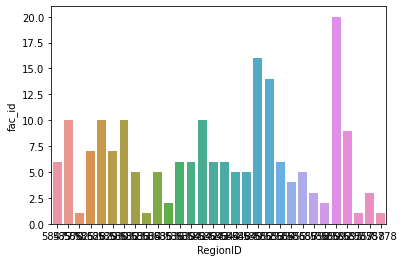

In [385]:
sns.barplot(x=MA['RegionID'],y=MA['fac_id'])